### Chapter 2: Animations and interactive plotting

#### Basic animation with FuncAnimation

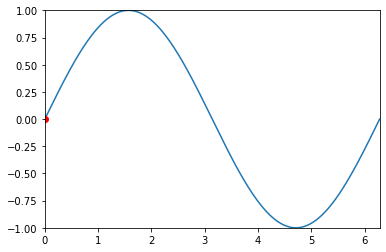

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TWOPI = 2*np.pi
fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])
redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0.0, TWOPI, 0.1),
                                      interval=10, 
                                      blit=True, 
                                      repeat=True)

plt.show();

#### Save animation to gif

MovieWriter imagemagick unavailable; using Pillow instead.


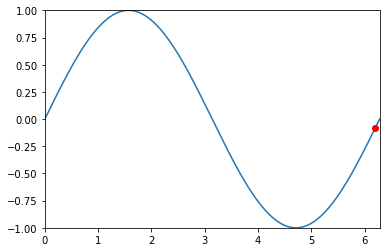

In [2]:
from matplotlib import rcParams

# make sure the full paths for ImageMagick and ffmpeg are configured
rcParams['animation.convert_path'] = r'C:\Program Files\ImageMagick\convert'
rcParams['animation.ffmpeg_path'] = r'C:\Program Files\ffmpeg\bin\ffmpeg.exe'

TWOPI = 2*np.pi
fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])
redDot, = plt.plot([0], [np.sin(0)], 'ro')
def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function with no repeat
myAnimation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0.0, TWOPI, 0.1),
                                      interval=10, 
                                      blit=True, 
                                      repeat=False)

# save animation at 30 frames per second
myAnimation.save('img/myAnimation.gif', 
                 writer='imagemagick', 
                 fps=30)

### Interactive controls with matplotlib.widgets

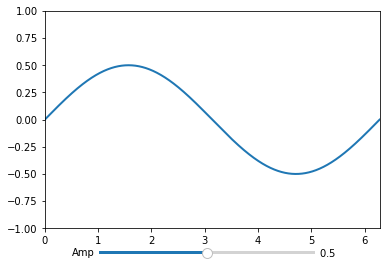

In [3]:
from matplotlib.widgets import Slider

TWOPI = 2*np.pi
fig, ax = plt.subplots()
t = np.arange(0.0, TWOPI, 0.001)

initial_amp = .5

s = initial_amp*np.sin(t)
l, = plt.plot(t, s, lw=2)
ax = plt.axis([0,TWOPI,-1,1])
axamp = plt.axes([0.25, .03, 0.50, 0.02])

# Slider
samp = Slider(axamp, 
              'Amp', 
              0, 
              1, 
              valinit=initial_amp)

def update(val):
    # amp is the current value of the slider
    amp = samp.val
    # update curve
    l.set_ydata(amp*np.sin(t))
    # redraw canvas while idle
    fig.canvas.draw_idle()

# call update function on slider value change
samp.on_changed(update)

plt.show()

In [ ]:
import matplotlib
import collections

#selecting the right backend, change qt4agg to your desired backend
matplotlib.use('qt4agg')

#command to open the pipe
datapipe = open('path to your pipe','r')

#amount of data to be displayed at once, this is the size of the x axis
#increasing this amount also makes plotting slightly slower
data_amount = 1000

#set the size of the deque object
datalist = collections.deque([0]*data_amount,data_amount)

#configure the graph itself
fig, ax = plt.subplots()
line, = ax.plot([0,]*data_amount)

#size of the y axis is set here
ax.set_ylim(0,256)

def update(data):
    line.set_ydata(data)
    return line,

def data_gen():
    while True:
        """
        We read two data points in at once, to improve speed
        You can read more at once to increase speed
        Or you can read just one at a time for improved animation smoothness
        data from the pipe comes in as a string,
        and is seperated with a newline character,
        which is why we use respectively eval and rstrip.
        """
        
        datalist.append(eval((datapipe.readline()).rstrip('\n')))
        datalist.append(eval((datapipe.readline()).rstrip('\n')))
        
        yield datalist
        
ani = animation.FuncAnimation(fig,update,data_gen,interval=0, blit=True)
plt.show()

### End.